In [2]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import os

# open file /run/secrets/postgres_pwd
with open(os.getenv("POSTGRES_PASSWORD_FILE"), 'r') as file:
    password = file.read().strip()

# Connect to your postgres DB
conn = psycopg2.connect(
    host="postgres",      # or IP address
    port=5432,             # default postgres port
    database=os.getenv("POSTGRES_DB"),
    user=os.getenv("POSTGRES_USER"),
    password="mysecretpassword"
)

# Open a cursor to perform database operations
# cur = conn.cursor()

# Example: execute a query
# cur.execute("SELECT version();")

# Fetch result
# db_version = cur.fetchone()
# print(f"Database version: {db_version}")

cur = conn.cursor()
sql = "SELECT event_type, count(*) FROM customers GROUP BY event_type;"
cur.execute(sql)

result = cur.fetchall()
print(result)
# Always close cursor and connection when done
cur.close()
conn.close()


[('view', 8324510), ('cart', 4841265), ('remove_from_cart', 2612475), ('purchase', 1276291)]


In [3]:
df = pd.DataFrame(result, columns=['event', 'amount']).set_index('event')
df

,amount
event,
view,8324510
cart,4841265
remove_from_cart,2612475
purchase,1276291


In [4]:
df.describe()

,amount
count,4.000000e+00
mean,4.263635e+06
std,3.080850e+06
min,1.276291e+06
25%,2.278429e+06
50%,3.726870e+06
75%,5.712076e+06
max,8.324510e+06


([<matplotlib.patches.Wedge at 0x7f02e4fd9940>,
 [Text(0.041075595605711133, 1.0992328213102247, 'view'),
  Text(-0.7527705033478365, -0.8020826449247267, 'cart'),
  Text(0.6385557360585555, -0.8956821824434806, 'remove_from_cart'),
  Text(1.0697394000849663, -0.256237420970975, 'purchase')],
 [Text(0.02240487033038789, 0.5995815388964861, '48.8%'),
  Text(-0.4106020927351835, -0.43749962450439633, '28.4%'),
  Text(0.34830312875921204, -0.4885539176964439, '15.3%'),
  Text(0.5834942182281634, -0.13976586598416815, '7.5%')])

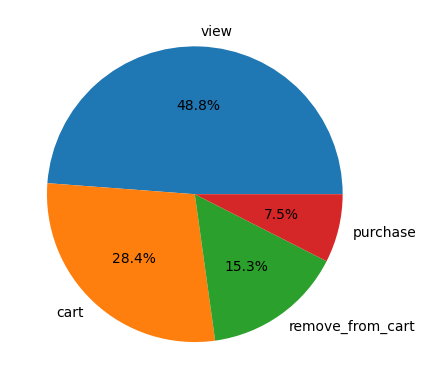

In [5]:
labels = df.index
sizes = df['amount']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')